In [43]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns

In [44]:
# import csv file
df = pd.read_csv(r'D:\Python\EDA\Diwali_sales\Diwali Sales Data.csv', encoding='unicode_escape')

In [45]:
df.shape

(11251, 15)

In [46]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


### Overview of the Data

In [47]:
# Display basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB
None


In [48]:
# Display summary statistics for numerical columns
print(df.describe())

            User_ID           Age  Marital_Status        Orders        Amount  \
count  1.125100e+04  11251.000000    11251.000000  11251.000000  11239.000000   
mean   1.003004e+06     35.421207        0.420318      2.489290   9453.610858   
std    1.716125e+03     12.754122        0.493632      1.115047   5222.355869   
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000   
25%    1.001492e+06     27.000000        0.000000      1.500000   5443.000000   
50%    1.003065e+06     33.000000        0.000000      2.000000   8109.000000   
75%    1.004430e+06     43.000000        1.000000      3.000000  12675.000000   
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000   

       Status  unnamed1  
count     0.0       0.0  
mean      NaN       NaN  
std       NaN       NaN  
min       NaN       NaN  
25%       NaN       NaN  
50%       NaN       NaN  
75%       NaN       NaN  
max       NaN       NaN  


### Handle Missing Values

In [49]:
# Check for missing values
print(df.isnull().sum())

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64


Advanced Imputation:

Impute missing values based on more advanced methods like regression imputation, k-Nearest Neighbors (KNN) imputation, or using machine learning models.

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['NumericalColumn'] = imputer.fit_transform(df[['NumericalColumn']])

In [52]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [53]:
df.head(20)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99


In [54]:
# Check for missing values
print(df.isnull().sum())

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64


In [55]:
# drop null values
df.dropna(inplace=True)

In [56]:
# Check for missing values
print(df.isnull().sum())

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64


In [ ]:
# change data type
#df['Amount'] = df['Amount'].astype('int')

In [57]:
df['Amount'].dtypes

dtype('float64')

In [58]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [59]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [60]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### Univariate Analysis

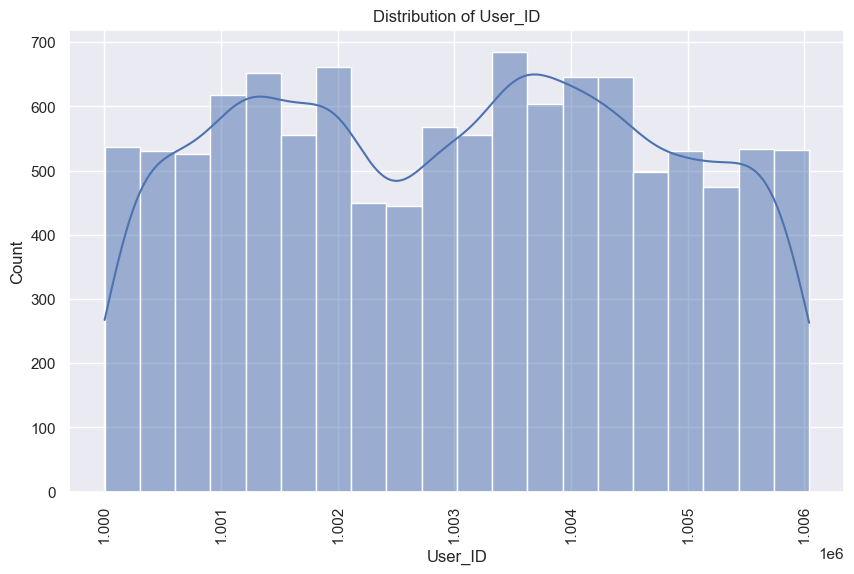

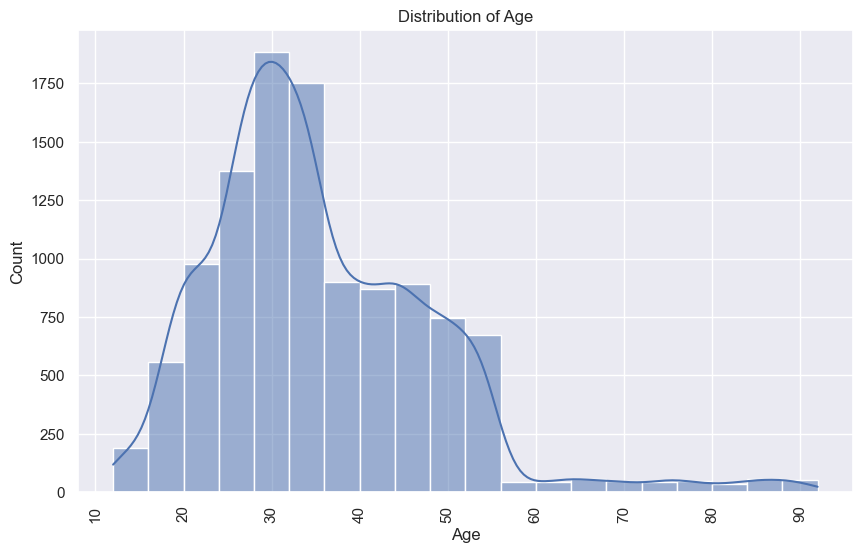

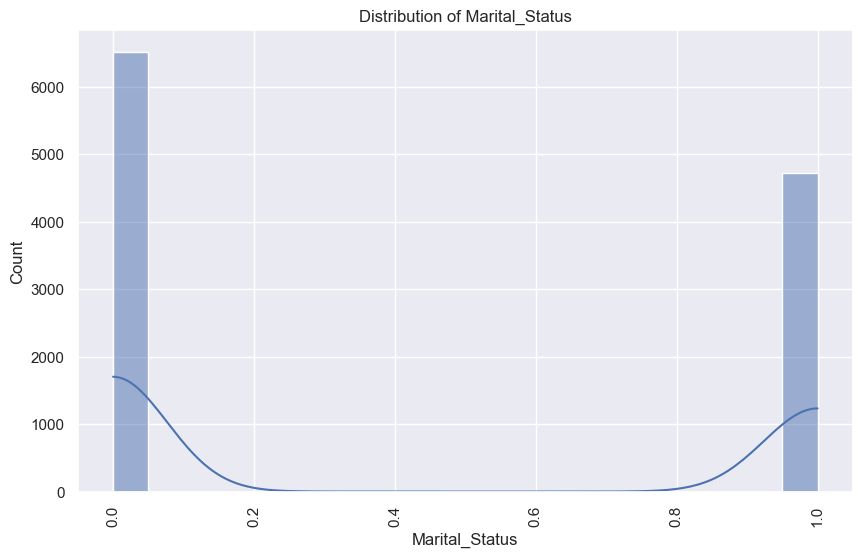

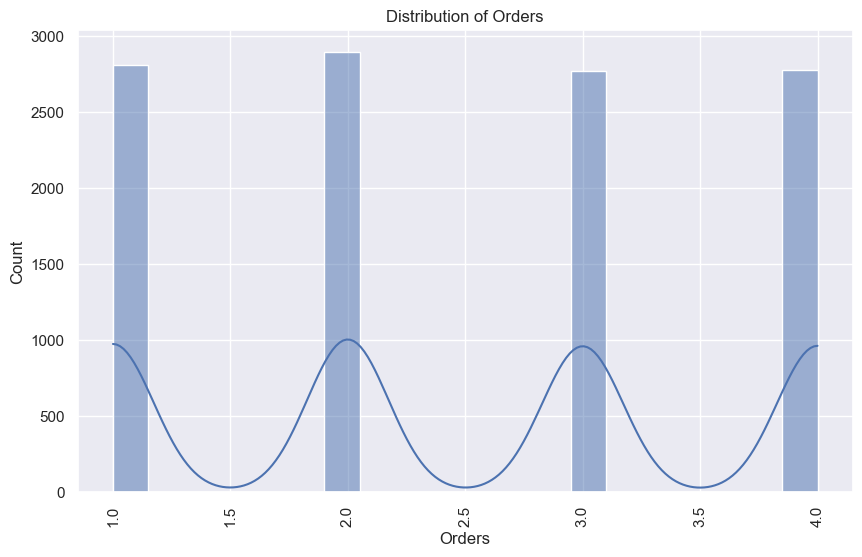

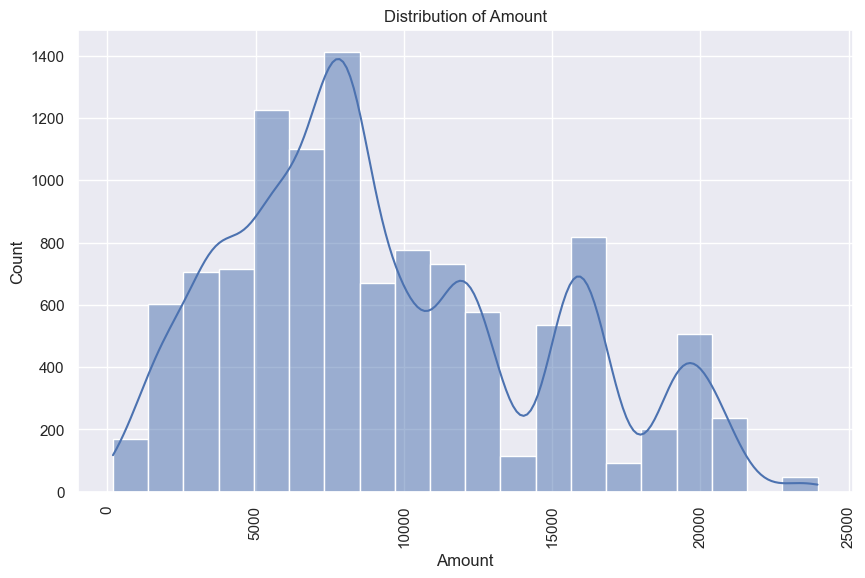

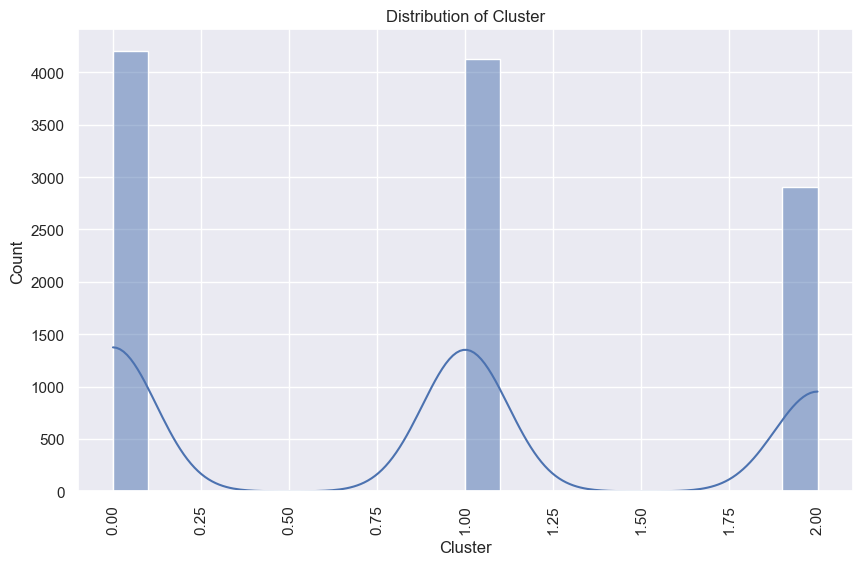

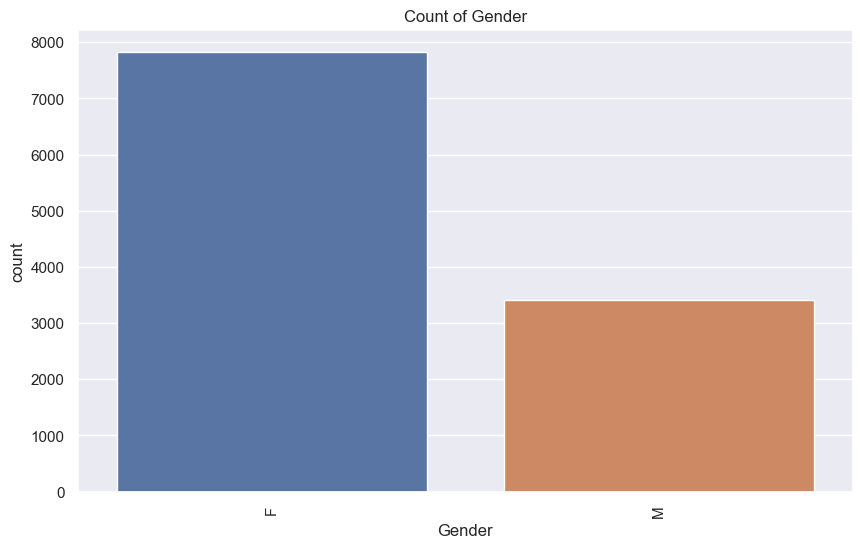

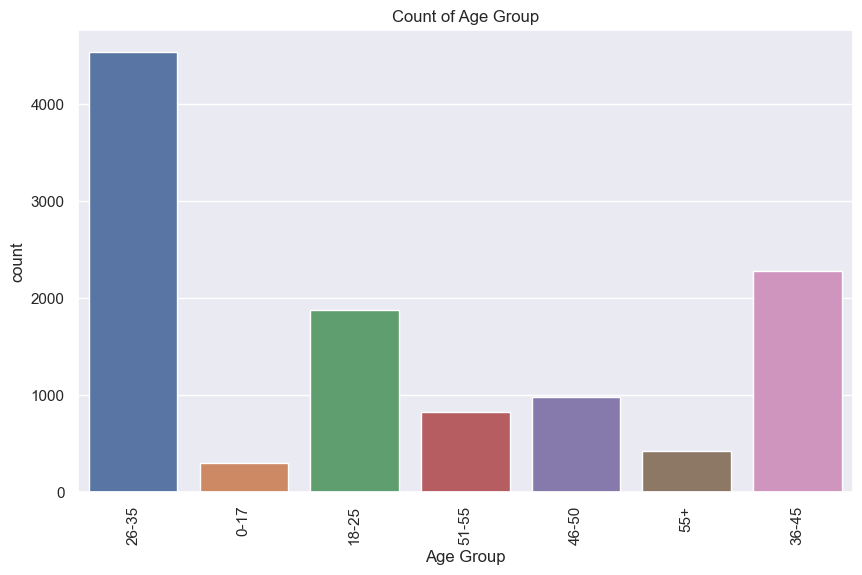

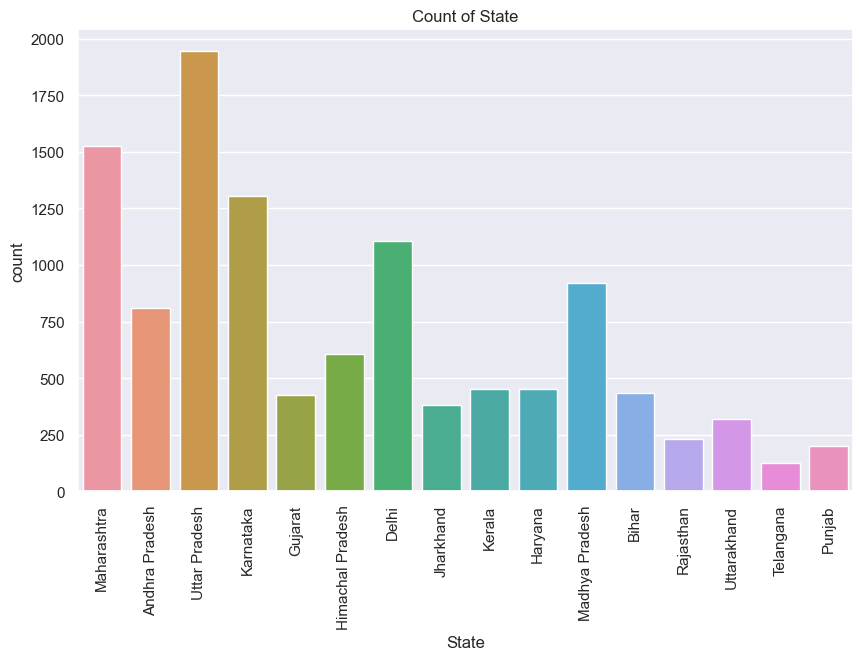

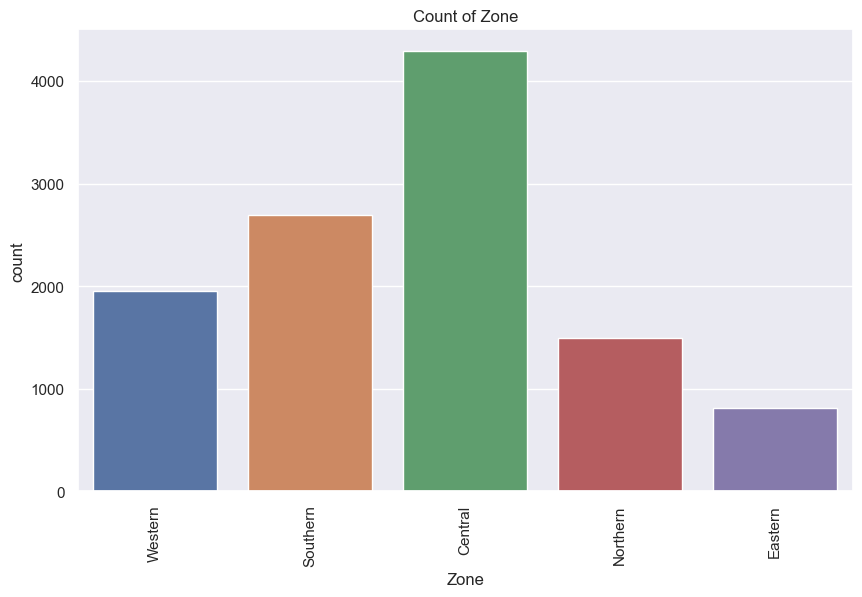

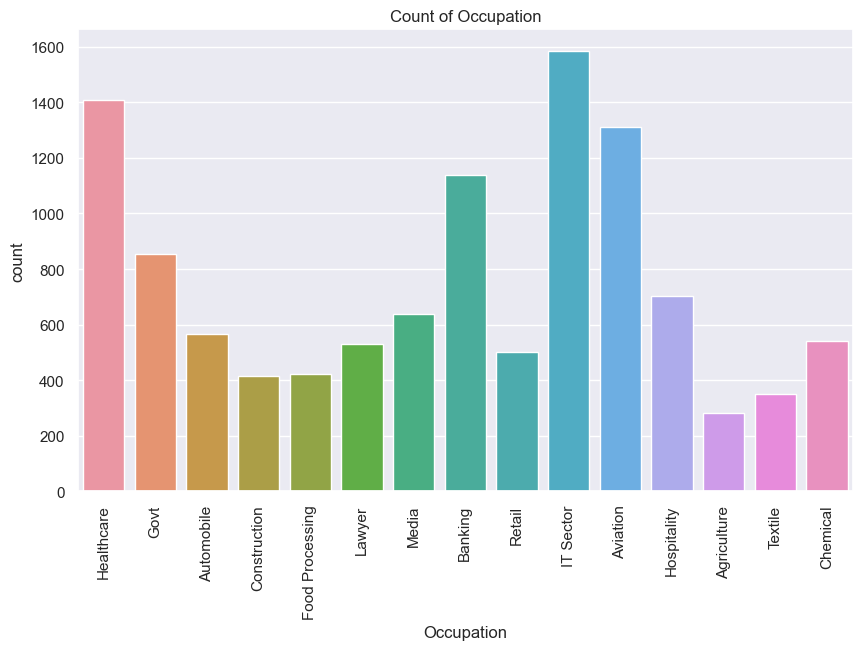

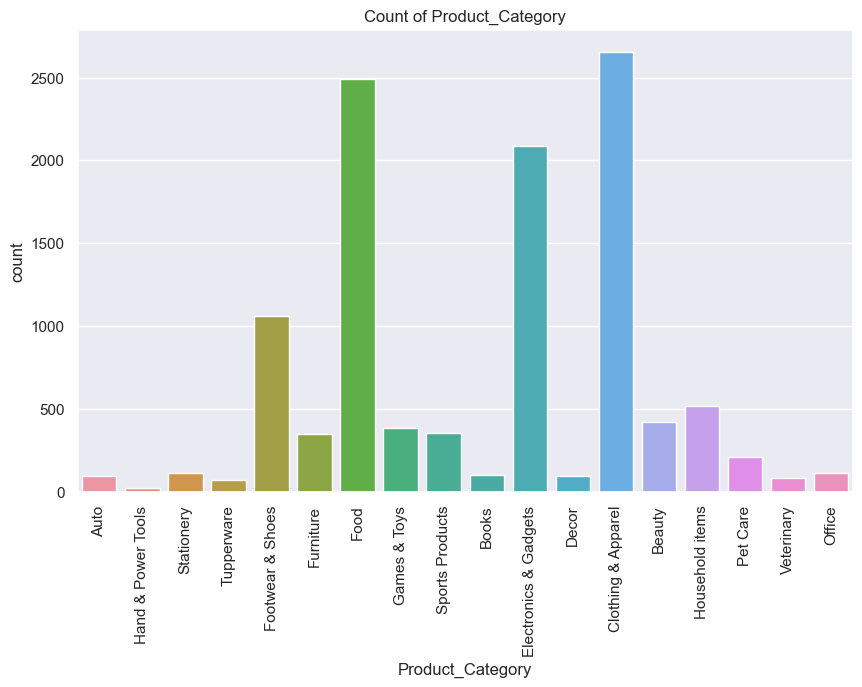

In [81]:
# Explore numeric columns
for column in df.select_dtypes(include='number').columns:
    # Exclude Cust_name and Product_ID columns
    if column not in ['Cust_name', 'Product_ID']:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], bins=20, kde=True)

        # Add annotations for histogram
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=90)
        plt.show()

# Explore categorical columns
for column in df.select_dtypes(include='object').columns:
    # Exclude Cust_name and Product_ID columns
    if column not in ['Cust_name', 'Product_ID']:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=column)

        # Add annotations for count plot
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

        plt.title(f'Count of {column}')
        plt.xticks(rotation=90)
        plt.show()

### Correlation Analysis

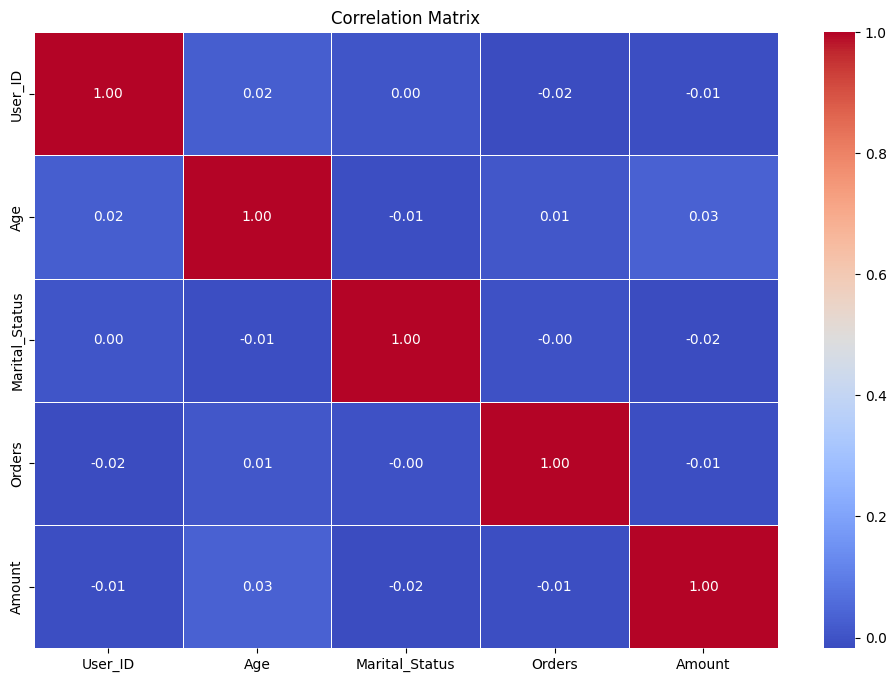

In [62]:
# Exclude non-numeric columns before calculating correlation
numeric_columns = df.select_dtypes(include='number').columns
correlation_matrix = df[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Exploratory Data Analysis

### Gender

### How is the gender distribution

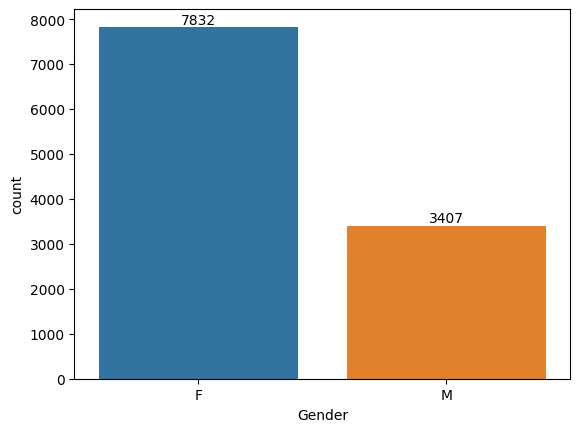

In [63]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

### How does the age distribution vary among different states,

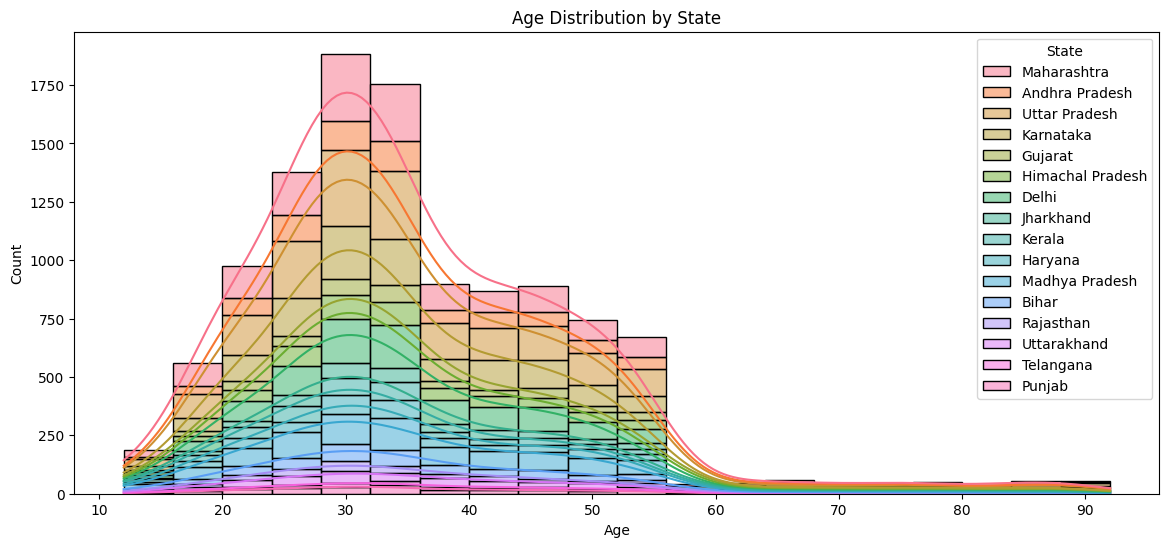

In [64]:
plt.figure(figsize=(14, 6))
sns.histplot(x='Age', hue='State', multiple='stack', data=df, bins=20, kde=True)
plt.title('Age Distribution by State')
plt.show()

### How is the distribution of customers across different age groups and genders 

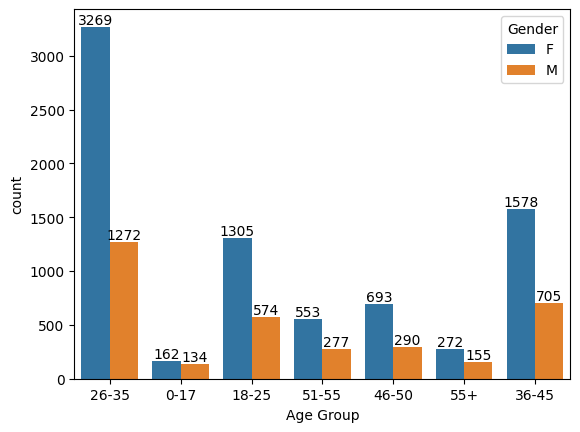

In [65]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

### State

In [66]:
state_summary = df.groupby('State').agg({
    'Age': 'mean',
    'Orders': 'sum',
    'Amount': 'sum'
}).reset_index()

zone_summary = df.groupby('Zone').agg({
    'Age': 'mean',
    'Orders': 'sum',
    'Amount': 'sum'
}).reset_index()

print("Summary Statistics by State:")
print(state_summary)

print("\nSummary Statistics by Zone:")
print(zone_summary)

Summary Statistics by State:
               State        Age  Orders       Amount
0     Andhra Pradesh  35.588163    2051   8037146.99
1              Bihar  35.527650    1062   4022757.00
2              Delhi  35.548007    2740  11603819.45
3            Gujarat  36.236534    1066   3946082.00
4            Haryana  35.084071    1109   4220175.00
5   Himachal Pradesh  35.555921    1568   4963368.00
6          Jharkhand  35.694737     953   3026456.00
7          Karnataka  35.280675    3240  13523540.00
8             Kerala  34.492274    1137   3894491.99
9     Madhya Pradesh  35.820847    2252   8101142.00
10       Maharashtra  34.566557    3810  14427543.00
11            Punjab  34.530000     495   1525800.00
12         Rajasthan  34.506494     555   1909409.00
13         Telangana  37.680000     312   1151490.00
14     Uttar Pradesh  35.595165    4807  19374968.00
15       Uttarakhand  36.931250     824   2520944.00

Summary Statistics by Zone:
       Zone        Age  Orders       Amou

In [ ]:
# 2. Distribution of Categorical Variables
plt.figure(figsize=(14, 6))
sns.countplot(x='State', hue='Gender', data=df)
plt.title('Gender Distribution by State')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(x='Zone', hue='Marital_Status', data=df)
plt.title('Marital Status Distribution by Zone')
plt.xticks(rotation=90)
plt.show()

### total number of orders from top 10 states

<Axes: xlabel='State', ylabel='Orders'>

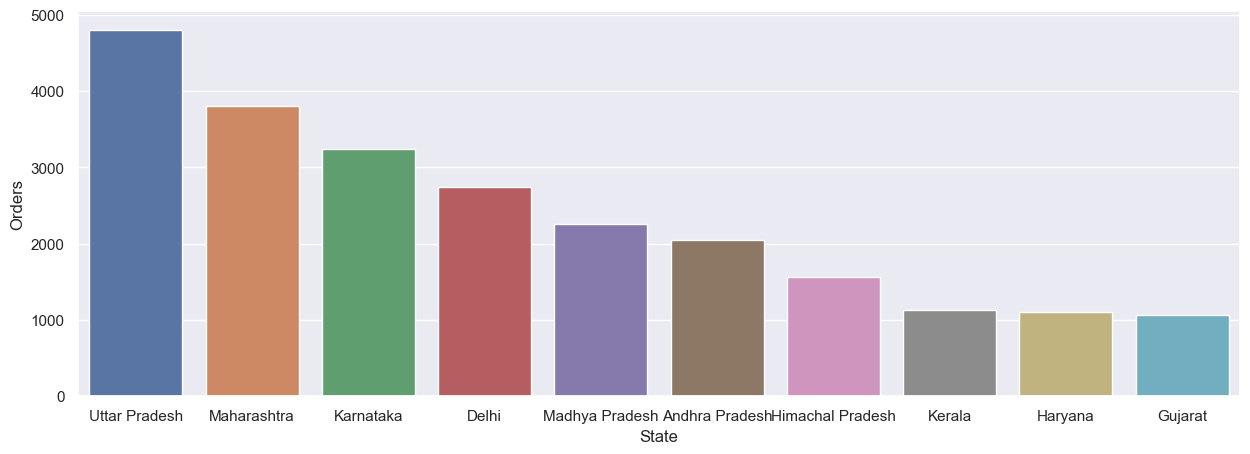

In [67]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status
### How is the distribution of customers across different marital statuses

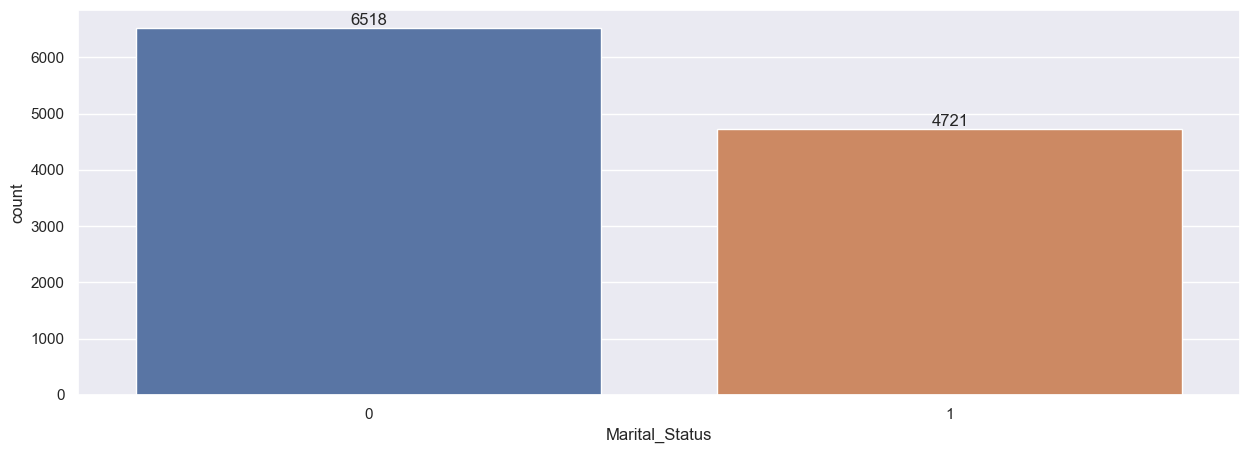

In [68]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

### From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

<Axes: xlabel='Marital_Status', ylabel='Amount'>

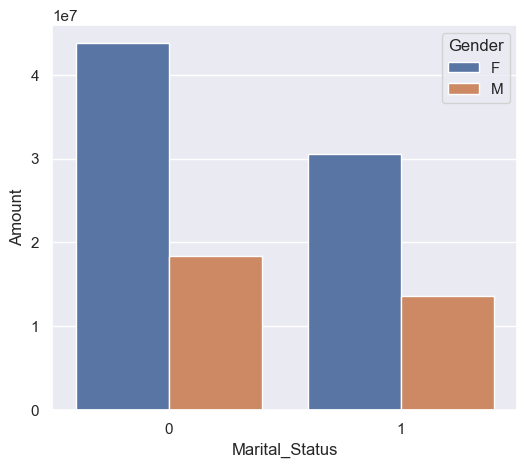

In [69]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

### Occupation
### How is the distribution of customers across different occupations depicted in the count plot

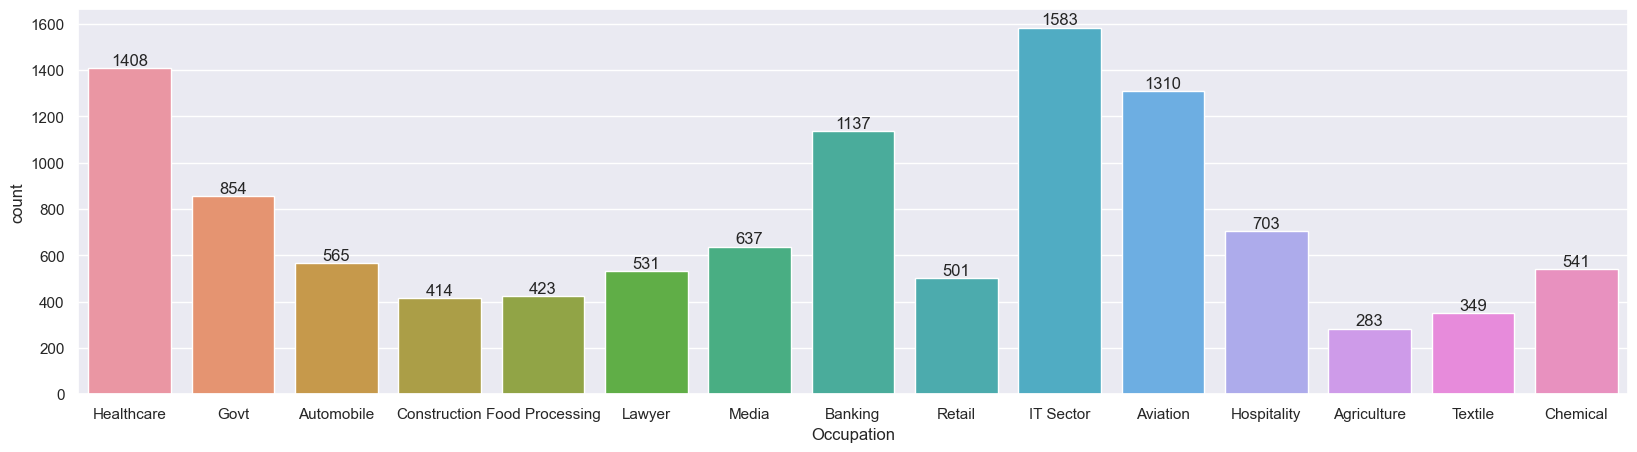

In [70]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

### What is the total sales amount for each occupation category

<Axes: xlabel='Occupation', ylabel='Amount'>

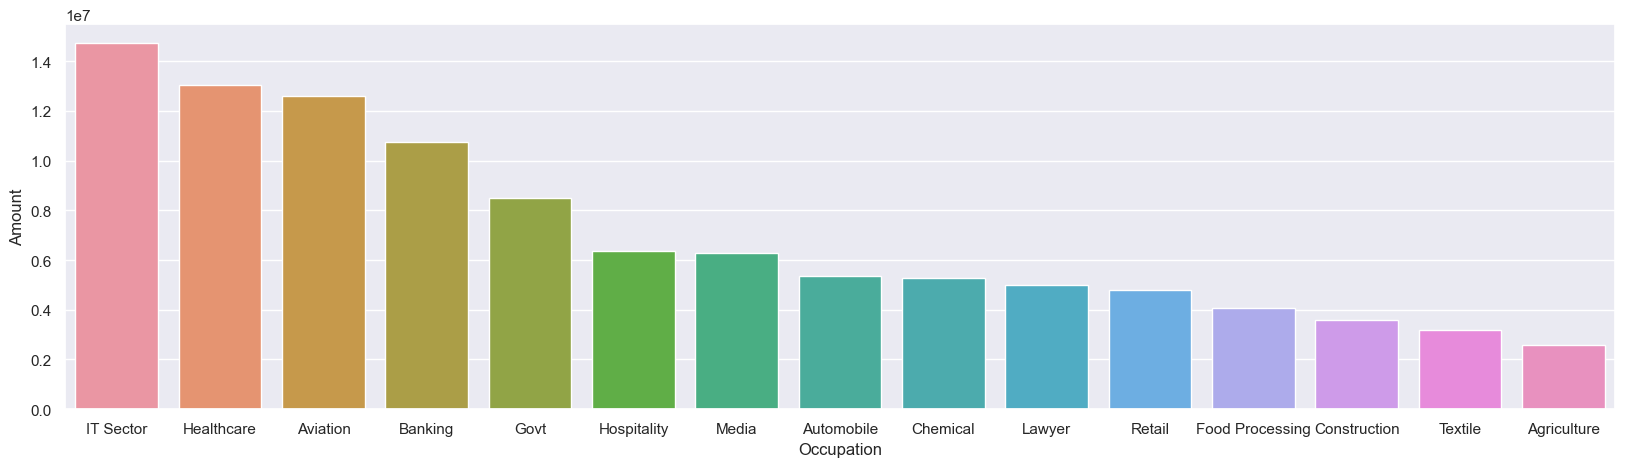

In [71]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

### "How does the distribution of the top 5 product categories vary across different states, as depicted in the count plot?"

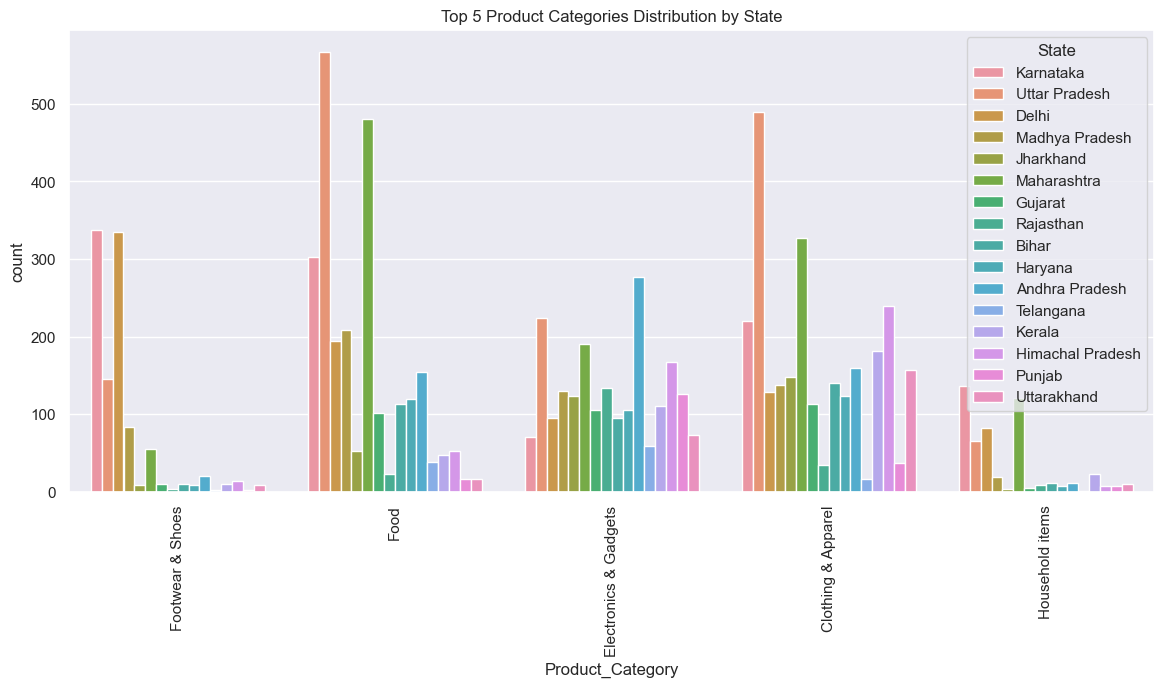

In [72]:
# Get the top 5 product categories
top_categories = df['Product_Category'].value_counts().head(5).index

# Filter the DataFrame for the top 5 categories
df_top_categories = df[df['Product_Category'].isin(top_categories)]

# Plot the distribution
plt.figure(figsize=(14, 6))
sns.countplot(x='Product_Category', hue='State', data=df_top_categories)
plt.title('Top 5 Product Categories Distribution by State')
plt.xticks(rotation=90)
plt.show()

### What is the distribution of products across different categories

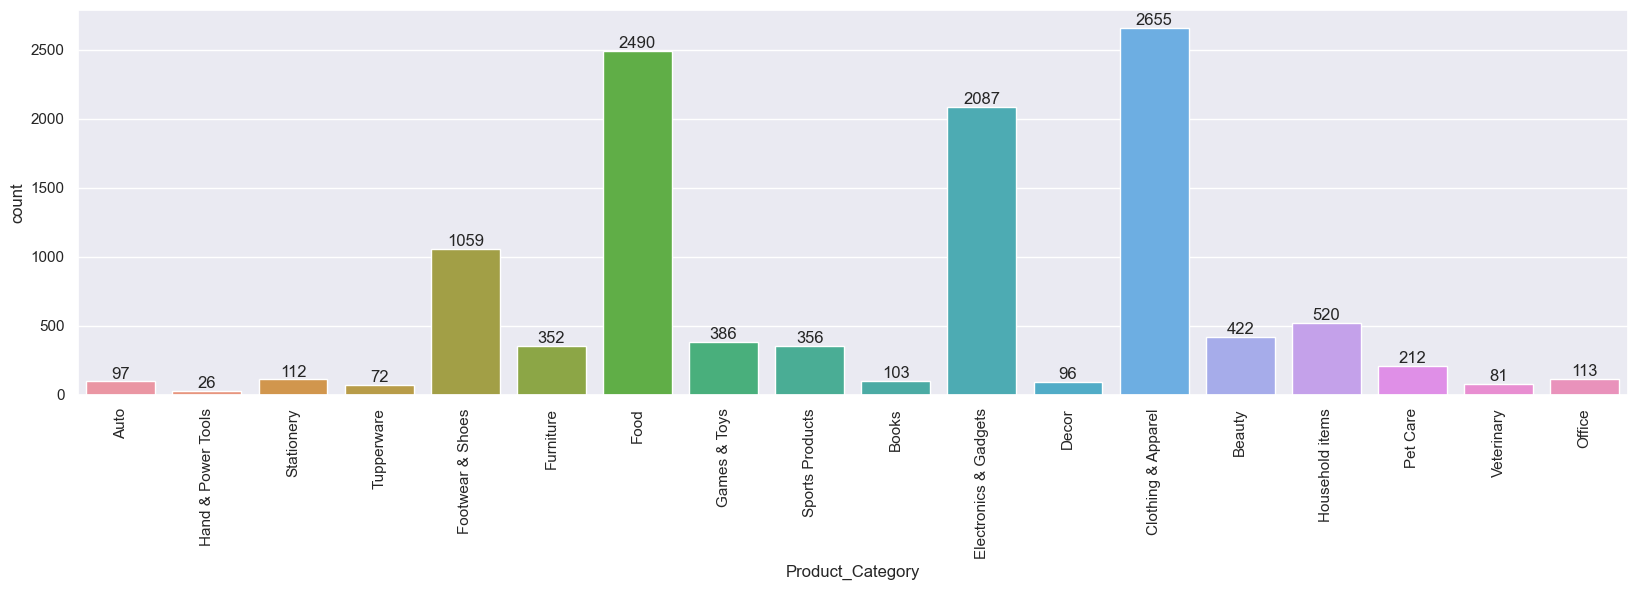

In [73]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for bars in ax.containers:
    ax.bar_label(bars)
    

### What insights can be derived from the top 10 product categories by total sales, and which category stands out as the highest contributor to overall sales based on the provided bar plot?

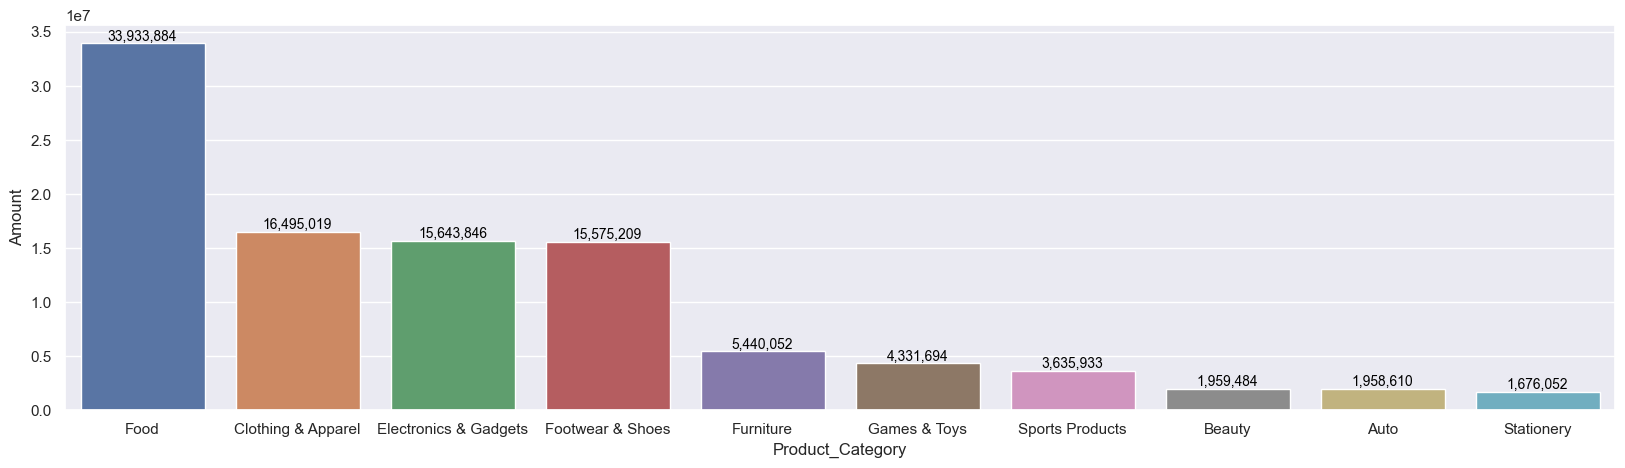

In [74]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data=sales_state, x='Product_Category', y='Amount')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Which are the top 10 best-selling products based on the total number of orders, and how does their order quantity compare, as illustrated in the bar plot?

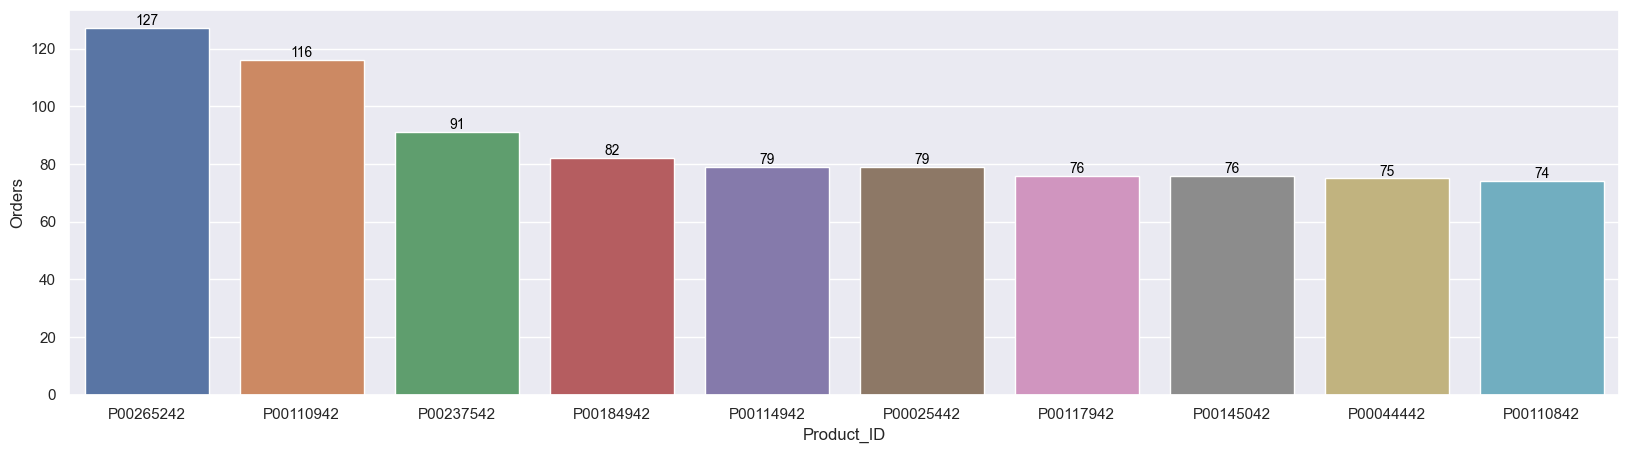

In [75]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

### top 10 most sold products (same thing as above)

<Axes: xlabel='Product_ID'>

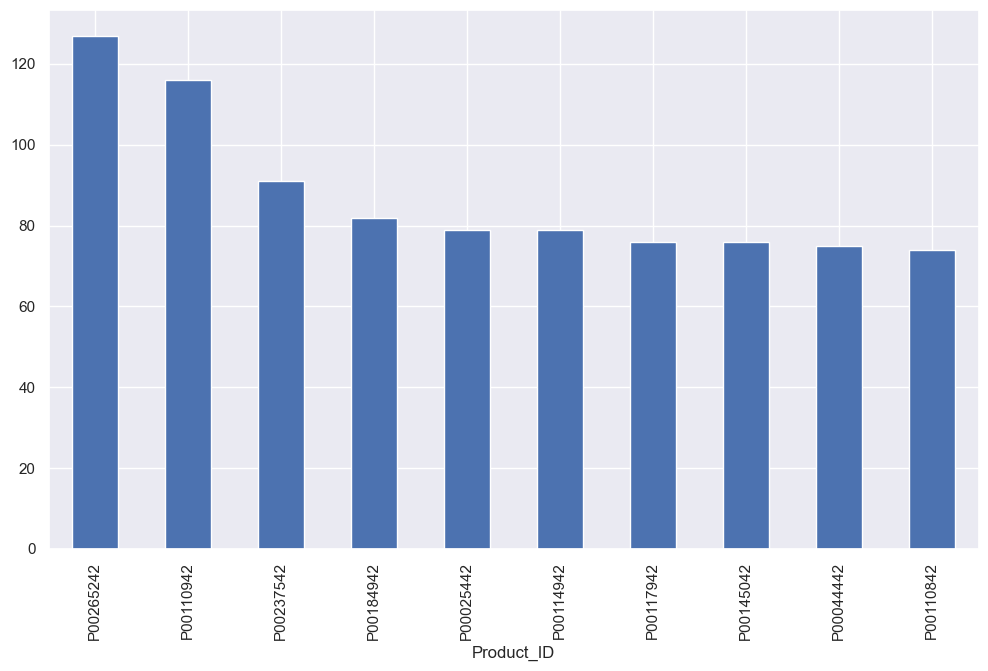

In [76]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

### Outlier Detection
Plot a box plot to identify outliers in the 'Amount' column

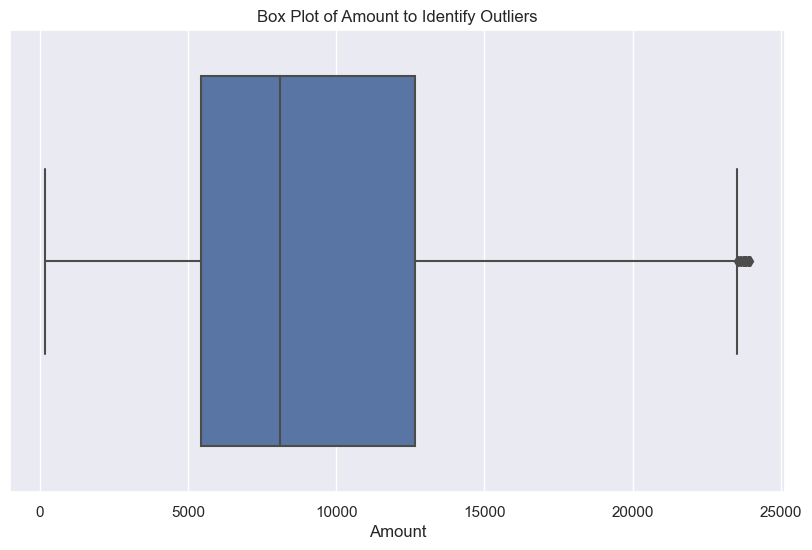

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Amount', data=df)
plt.title('Box Plot of Amount to Identify Outliers')
plt.show()

### Calculate the Outlie in the Data manually

In [78]:
# Calculate the interquartile range (IQR)
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for identifying outliers
outlier_threshold = 1.5

# Identify outliers based on the IQR method
outliers = df[(df['Amount'] < (Q1 - outlier_threshold * IQR)) | (df['Amount'] > (Q3 + outlier_threshold * IQR))]

# Display the identified outliers
print("Identified Outliers:")
print(outliers)

Identified Outliers:
    User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0   1002903    Sanskriti  P00125942      F     26-35   28               0   
1   1000732       Kartik  P00110942      F     26-35   35               1   
2   1001990        Bindu  P00118542      F     26-35   35               1   
3   1001425       Sudevi  P00237842      M      0-17   16               0   
4   1000588         Joni  P00057942      M     26-35   28               1   
5   1000588         Joni  P00057942      M     26-35   28               1   
6   1001132         Balk  P00018042      F     18-25   25               1   
8   1003224       Kushal  P00205642      M     26-35   35               0   
9   1003650        Ginny  P00031142      F     26-35   26               1   
10  1003829     Harshita  P00200842      M     26-35   34               0   
11  1000214     Kargatis  P00119142      F     18-25   20               0   
12  1004035       Elijah  P00080342      F     18-25   

### Customer Segmentation

Customer segmentation is the process of dividing a customer base into distinct groups or segments based on specific characteristics, behaviors, or demographics. The goal of customer segmentation is to understand and categorize customers with similar traits so that businesses can tailor their marketing strategies, products, and services to meet the unique needs and preferences of each segment. This approach enables more effective communication and personalized interactions, ultimately enhancing customer satisfaction and loyalty.

### Use clustering algorithms such as K-means for customer segmentation.

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


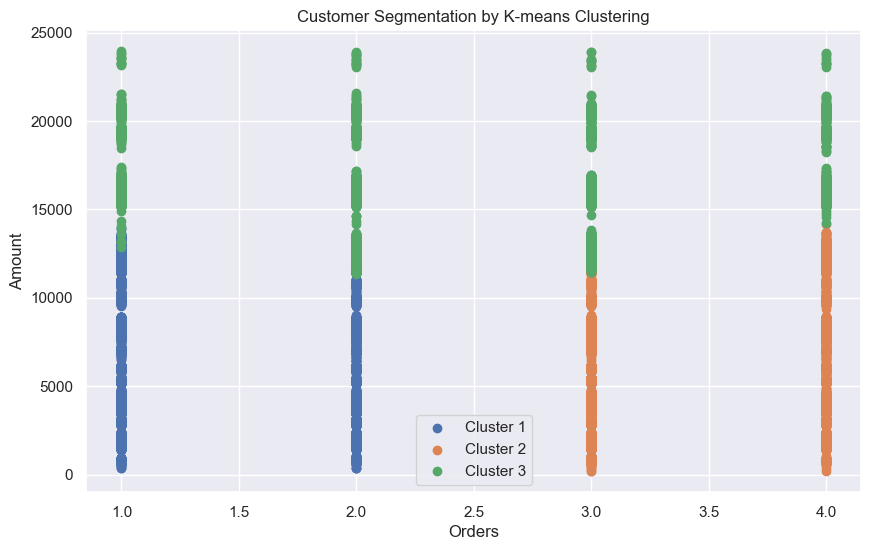

In [79]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering (you might need to adjust based on your dataset)
features_for_clustering = ['Age', 'Orders', 'Amount']

# Extract the selected features
X = df[features_for_clustering]

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you may need to experiment with this)
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Orders'], cluster_data['Amount'], label=f'Cluster {cluster + 1}')

plt.title('Customer Segmentation by K-means Clustering')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.legend()
plt.show()

### Customer Churn Analysis
### Analyze churn rates over time or in different regions.

Churn Rate: 0.00%


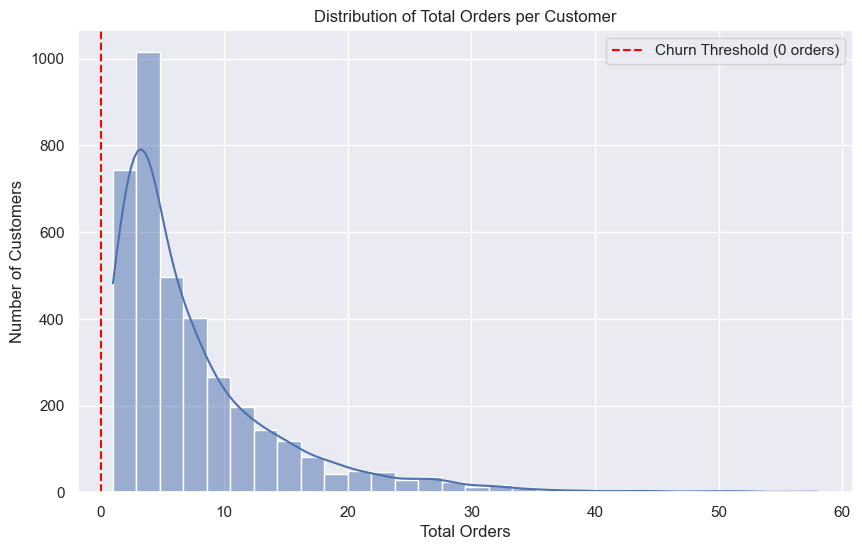

In [80]:
# Assuming 'User_ID' is a unique identifier for customers
# Calculate the total number of orders for each customer
customer_orders = df.groupby('User_ID')['Orders'].sum().reset_index()

# Define a churn threshold (e.g., no orders in the last 3 months)
churn_threshold = 0  # Adjust the threshold based on your criteria

# Identify churned customers
churned_customers = customer_orders[customer_orders['Orders'] <= churn_threshold]

# Calculate churn rate
churn_rate = len(churned_customers) / len(customer_orders) * 100

print(f"Churn Rate: {churn_rate:.2f}%")

# Visualize the distribution of total orders
plt.figure(figsize=(10, 6))
sns.histplot(customer_orders['Orders'], bins=30, kde=True)
plt.axvline(x=churn_threshold, color='red', linestyle='--', label=f'Churn Threshold ({churn_threshold} orders)')
plt.title('Distribution of Total Orders per Customer')
plt.xlabel('Total Orders')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*